# *Stock Market Analysis Project*

**Part 1: Importing the essential libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Part 2: Getting the data of all the stocks
Tickers: 
1. TSLA for Tesla
2. GM for General Motors
3. F for Ford

In [4]:
import pandas_datareader 
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)

In [7]:
end = datetime.datetime(2017,1,1)

In [10]:
tesla = web.DataReader('TSLA','yahoo',start,end)

In [11]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [12]:
ford = web.DataReader("F",'yahoo',start,end)

In [13]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [14]:
gm = web.DataReader('GM','yahoo',start,end)

In [15]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


**Part 2: Visualization of the stock data**

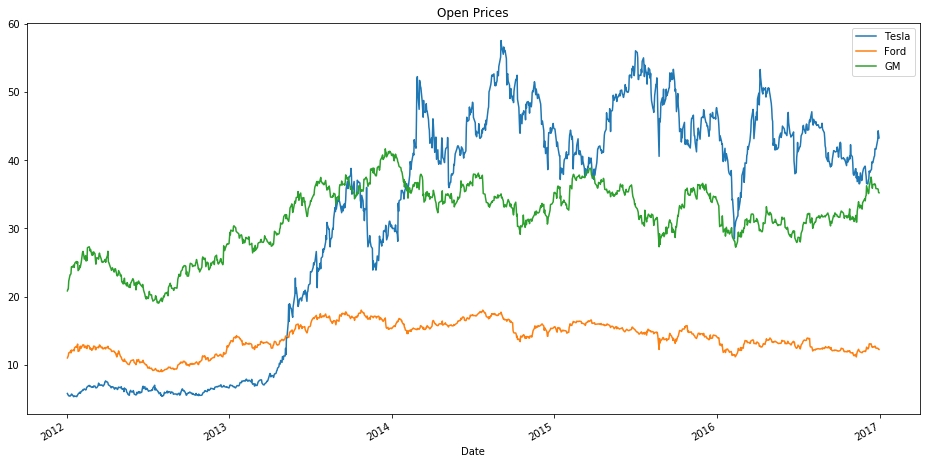

In [17]:
tesla['Open'].plot(label='Tesla', figsize=(16,8), title="Open Prices")
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend()

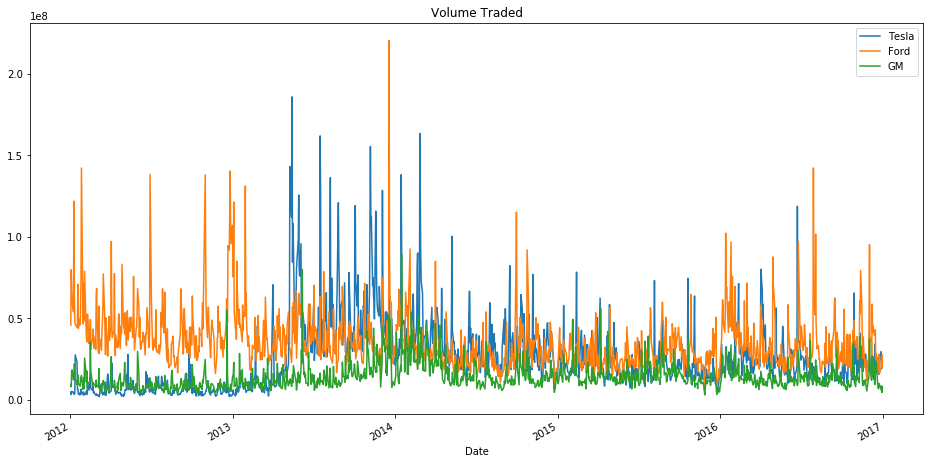

In [18]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title="Volume Traded")
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend()

In [19]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']

In [20]:
ford['Total Traded'] = ford['Open']*ford['Volume']

In [21]:
gm['Total Traded'] = gm['Open']*gm['Volume']

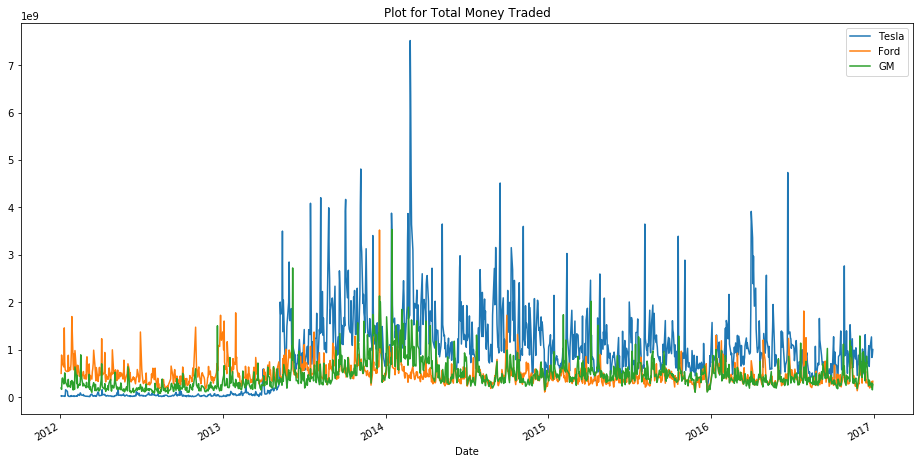

In [27]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8), title='Plot for Total Money Traded')
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend()

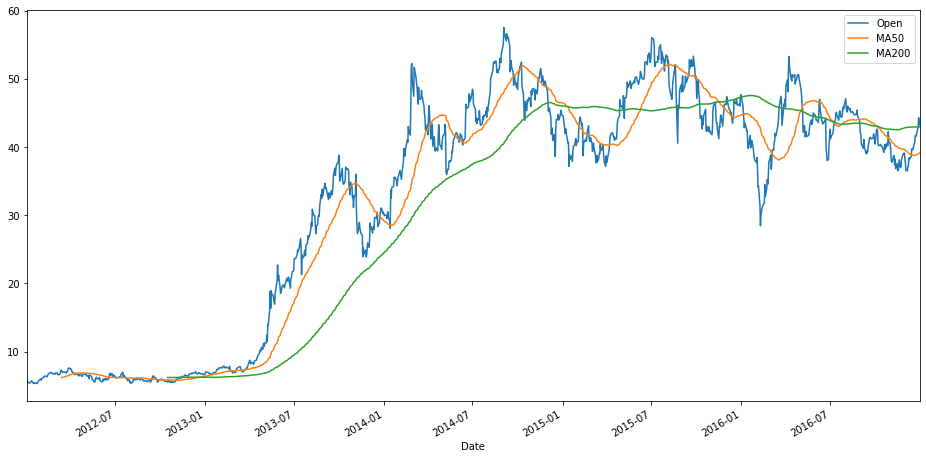

In [29]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(figsize=(16,8))
plt.margins(x=0)

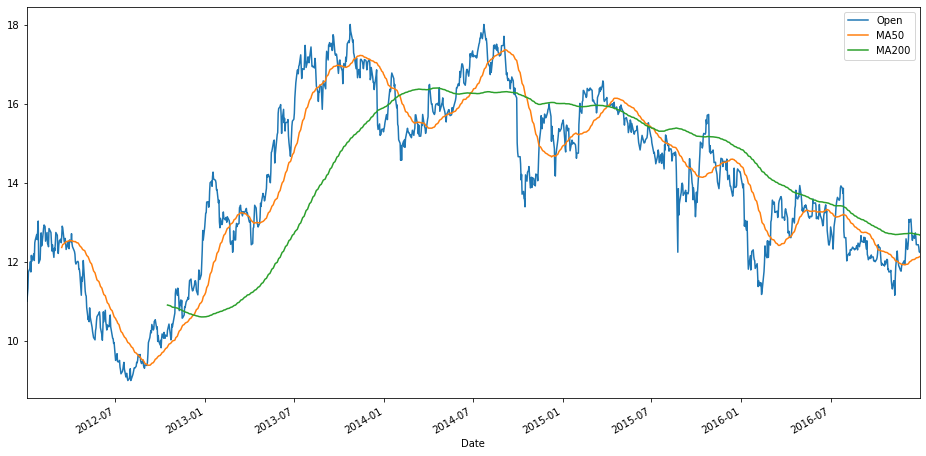

In [36]:
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open','MA50','MA200']].plot(figsize=(16,8))
plt.margins(x=0)

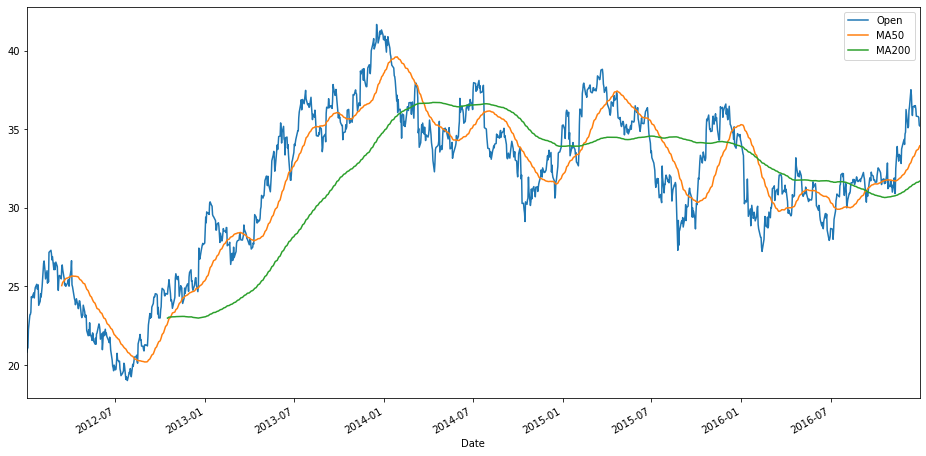

In [37]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))
plt.margins(x=0)

In [30]:
from pandas.plotting import scatter_matrix 

In [31]:
car_comp = pd.concat([tesla["Open"],gm["Open"],ford["Open"]], axis=1)

In [32]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [33]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


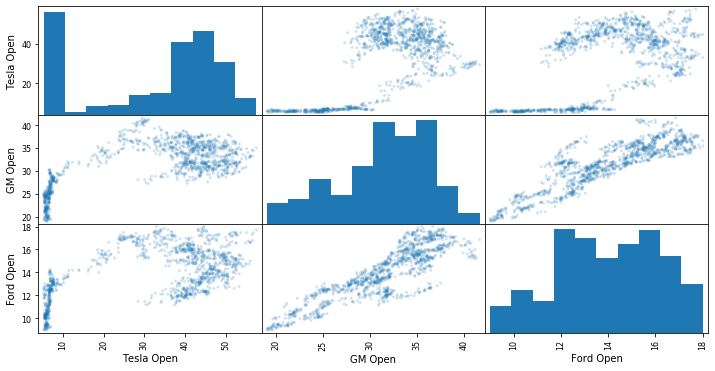

In [35]:
scatter_matrix(car_comp, figsize=(12,6), alpha=0.2);

**Part 3: Calculating the daily percentage change**

r(t) = (p(t)/p(t-1)) - 1 

- This essentially defines the r(t), return at time t, as equal to p(t) i.e. price at time t, divided by the p(t-1) i.e. price     at time t-1 which means price on the previous day, minus 1.
- This particular term is useful for determining the volatility of the stock of a particular company or index. So if the daily     returns have a wide distribution, the stock is more volatile from one day to the next.

In [49]:
tesla['Returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1 


In [57]:
tesla.drop(['MA50','MA200'], axis=1)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000,2.685921e+07,NaN
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000,1.777512e+07,-0.013177
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000,2.791268e+07,-0.021292
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000,2.682736e+07,-0.007743
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000,2.421900e+07,0.012635
...,...,...,...,...,...,...,...,...
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08,0.023459
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09,0.029015
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08,0.000957


In [50]:
ford['Returns'] = (ford['Close']/ford['Close'].shift(1)) - 1 

In [58]:
ford.drop(['MA50','MA200'], axis=1)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686
...,...,...,...,...,...,...,...,...
2016-12-23,12.46,12.36,12.43,12.46,15621200.0,10.150093,1.941715e+08,0.004839
2016-12-27,12.51,12.36,12.43,12.39,19467400.0,10.093071,2.419798e+08,-0.005618
2016-12-28,12.45,12.22,12.37,12.25,26875400.0,9.979024,3.324487e+08,-0.011299


In [51]:
gm['Returns'] = (gm['Close']/gm['Close'].shift(1)) - 1 

In [59]:
gm.drop(['MA50','MA200'], axis=1)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,-0.003490
...,...,...,...,...,...,...,...,...
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,31.217722,3.350535e+08,0.000000
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,31.086515,2.151115e+08,-0.004203
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.745390,3.020709e+08,-0.010974


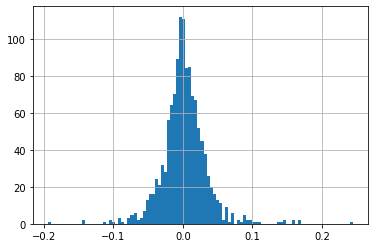

In [63]:
tesla['Returns'].hist(bins=100)  #most volatile

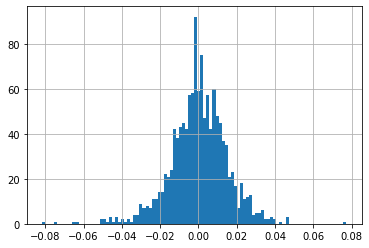

In [64]:
ford['Returns'].hist(bins=100)

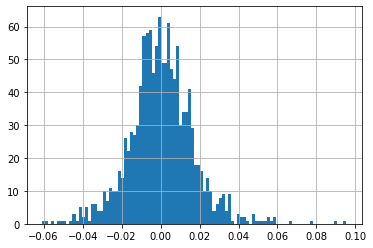

In [65]:
gm['Returns'].hist(bins=100)

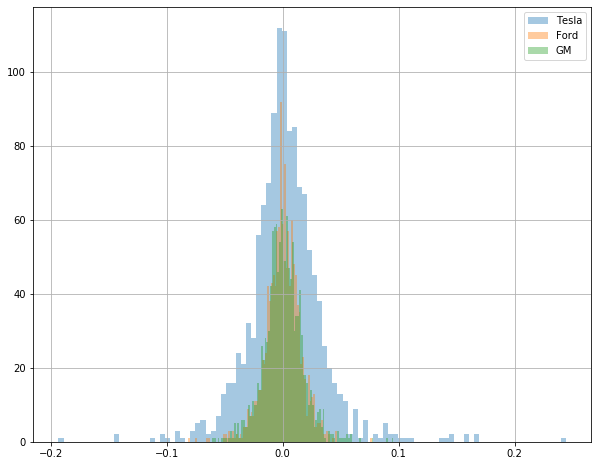

In [68]:
tesla['Returns'].hist(bins=100, label='Tesla', figsize=(10,8), alpha=0.4)
ford['Returns'].hist(bins=100, label='Ford', figsize=(10,8), alpha=0.4)
gm['Returns'].hist(bins=100, label='GM', figsize=(10,8), alpha=0.4)
plt.legend()

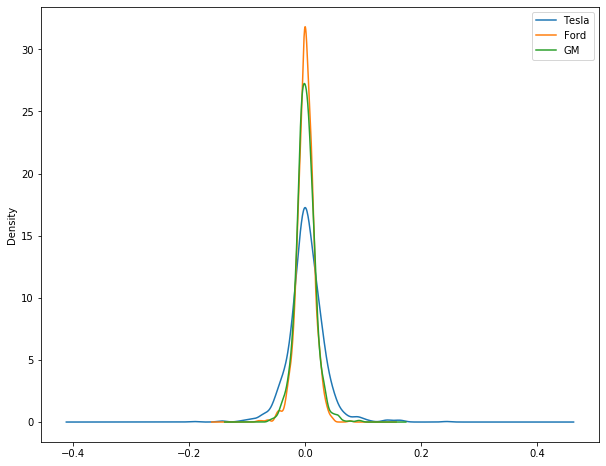

In [70]:
tesla['Returns'].plot(kind='kde', label='Tesla', figsize=(10,8))
ford['Returns'].plot(kind='kde', label='Ford', figsize=(10,8))
gm['Returns'].plot(kind='kde', label='GM', figsize=(10,8))
plt.legend()

**Cumulative Returns**

Now, I will be calculating the cumulative returns, through which we can basically answer the question that, *if I invest $1 on each of the companies, Tesla, Ford and General Motors, how much would it be worth today?*

While daily returns can be very benefitial in understanding the volitility of the stock, it doesn't give an immediate insight about the gains a person could make till date. For the cumulative returns we will use the closing price of the stock on day 1, which is the day we invested, and divide it by the closing price of today. If the cumulative return is above 1, we make a gain otherwise we are in a loss.


In [71]:
tesla['Cumulative Returns'] = (1 + tesla['Returns']).cumprod()

In [75]:
tesla.head(10)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns,Cumulative Returns
Date,,,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,NaN,NaN,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,NaN,NaN,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,NaN,NaN,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,NaN,NaN,0.012635,0.970442
2012-01-10,5.552,5.450,5.488,5.524,3359000,5.524,1.843419e+07,NaN,NaN,0.013578,0.983618
2012-01-11,5.676,5.460,5.524,5.646,3361500,5.646,1.856893e+07,NaN,NaN,0.022085,1.005342
2012-01-12,5.724,5.562,5.696,5.650,3646500,5.650,2.077046e+07,NaN,NaN,0.000708,1.006054
2012-01-13,5.700,4.528,5.680,4.558,27502000,4.558,1.562114e+08,NaN,NaN,-0.193274,0.811610


In [72]:
ford['Cumulative Returns'] = (1 + ford['Returns']).cumprod()

In [76]:
ford.head(10)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns,Cumulative Returns
Date,,,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN,NaN,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,NaN,NaN,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,NaN,NaN,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,NaN,NaN,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,NaN,NaN,0.007686,1.060198
2012-01-10,12.05,11.63,12.00,11.80,121750600.0,7.998916,1.461007e+09,NaN,NaN,0.000000,1.060198
2012-01-11,12.18,11.65,11.74,12.07,63806000.0,8.181942,7.490824e+08,NaN,NaN,0.022881,1.084456
2012-01-12,12.18,11.89,12.16,12.14,48687700.0,8.229394,5.920424e+08,NaN,NaN,0.005800,1.090746
2012-01-13,12.08,11.84,12.01,12.04,46366700.0,8.161605,5.568641e+08,NaN,NaN,-0.008237,1.081761


In [73]:
gm['Cumulative Returns'] = (1 + gm['Returns']).cumprod()

In [77]:
gm.head(10)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns,Cumulative Returns
Date,,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490,1.085036
2012-01-10,23.400000,22.780001,23.219999,23.240000,13538300.0,17.962051,3.143593e+08,NaN,NaN,0.017513,1.104038
2012-01-11,24.639999,23.340000,23.370001,24.469999,21947000.0,18.912706,5.129014e+08,NaN,NaN,0.052926,1.162470
2012-01-12,24.820000,23.760000,24.350000,24.670000,16750800.0,19.067287,4.078820e+08,NaN,NaN,0.008173,1.171972
2012-01-13,24.650000,23.910000,24.270000,24.290001,12963100.0,18.773592,3.146144e+08,NaN,NaN,-0.015403,1.153919


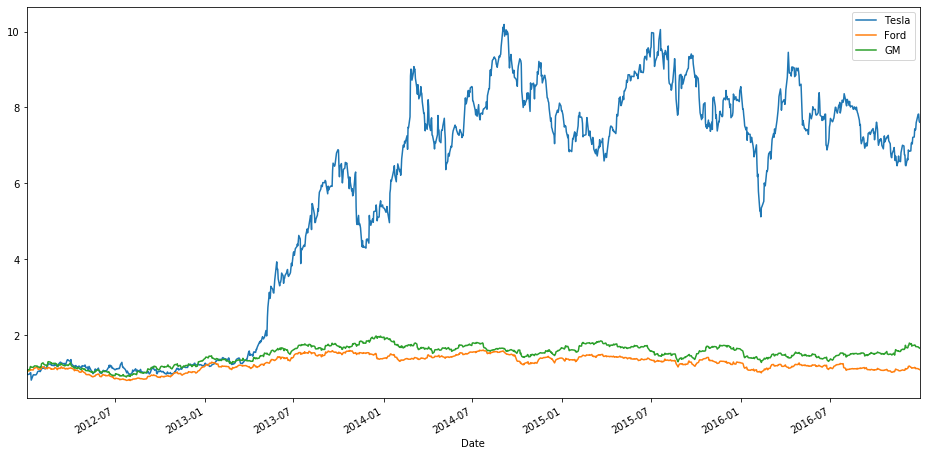

In [79]:
tesla['Cumulative Returns'].plot(label='Tesla', figsize=(16,8))
ford['Cumulative Returns'].plot(label='Ford', figsize=(16,8))
gm['Cumulative Returns'].plot(label='GM', figsize=(16,8))
plt.legend()
plt.margins(x=0)

This clearly shows that **Tesla** gives the maximum returns over the time period. 

Out of General Motors and Ford, although the trend seems to closer to each other, **General Motors** just overpasses Ford in terms of the cumulative returns. We could plot the graph and see it a bit closely!

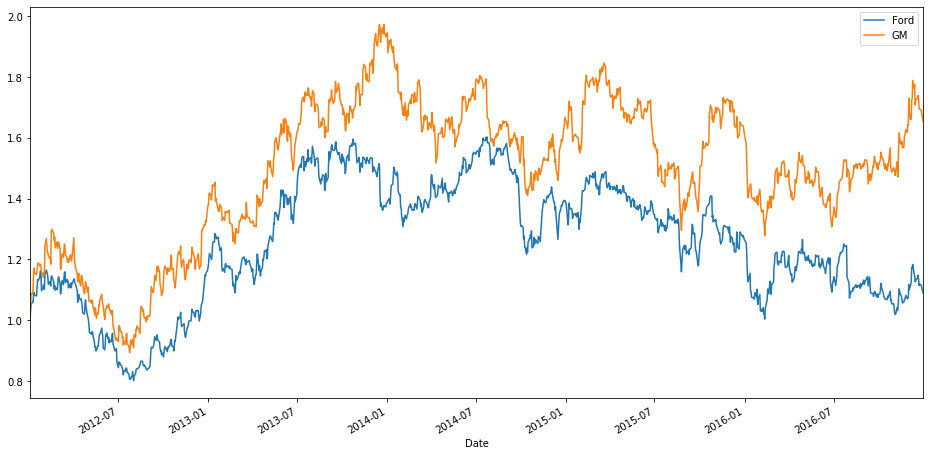

In [80]:
ford['Cumulative Returns'].plot(label='Ford', figsize=(16,8))
gm['Cumulative Returns'].plot(label='GM')
plt.legend()
plt.margins(x=0)

# *THANK YOU*